In [3]:
import xarray as xr 
import matplotlib.pyplot as plt
import cmocean
import numpy as np
import s3fs
import matplotlib.cm as cm

In [4]:
def load_and_swap(path):
    ds = xr.open_dataset(path)
    ds = ds.swap_dims({"obs": "time"}).reset_coords(drop=True)
    return ds

In [24]:
ctd = load_and_swap("mooring_data_11_24/deployment0018_CE04OSSM-RID27-03-CTDBPC000-telemetered-ctdbp_cdef_dcl_instrument_20241016T191502.303000-20241115T000001.597000.nc")
do = load_and_swap("mooring_data_11_24/deployment0018_CE04OSSM-RID27-04-DOSTAD000-telemetered-dosta_abcdjm_dcl_instrument_20241016T183009.899000-20241114T234830.481000.nc")
met = load_and_swap("mooring_data_11_24/deployment0018_CE04OSSM-SBD11-06-METBKA000-telemetered-metbk_hourly_20241016T185831.247000-20241114T233035.525000.nc")
co2_wat = load_and_swap("mooring_data_11_24/deployment0018_CE04OSSM-SBD12-04-PCO2AA000-telemetered-pco2a_a_dcl_instrument_water_20241016T210000.572000-20241114T070004.615000.nc")
co2_air = load_and_swap("mooring_data_11_24/deployment0018_CE04OSSM-SBD12-04-PCO2AA000-telemetered-pco2a_a_dcl_instrument_air_20241016T210209.346000-20241114T070212.434000.nc")

In [8]:
def basic_plot(da):
    plt.figure(figsize=(19, 6))
    plt.title(f"{da.attrs['long_name']}")
    plt.plot(da.time, da.values)
    plt.ylabel(da.attrs['units'])
    plt.margins(x=0)

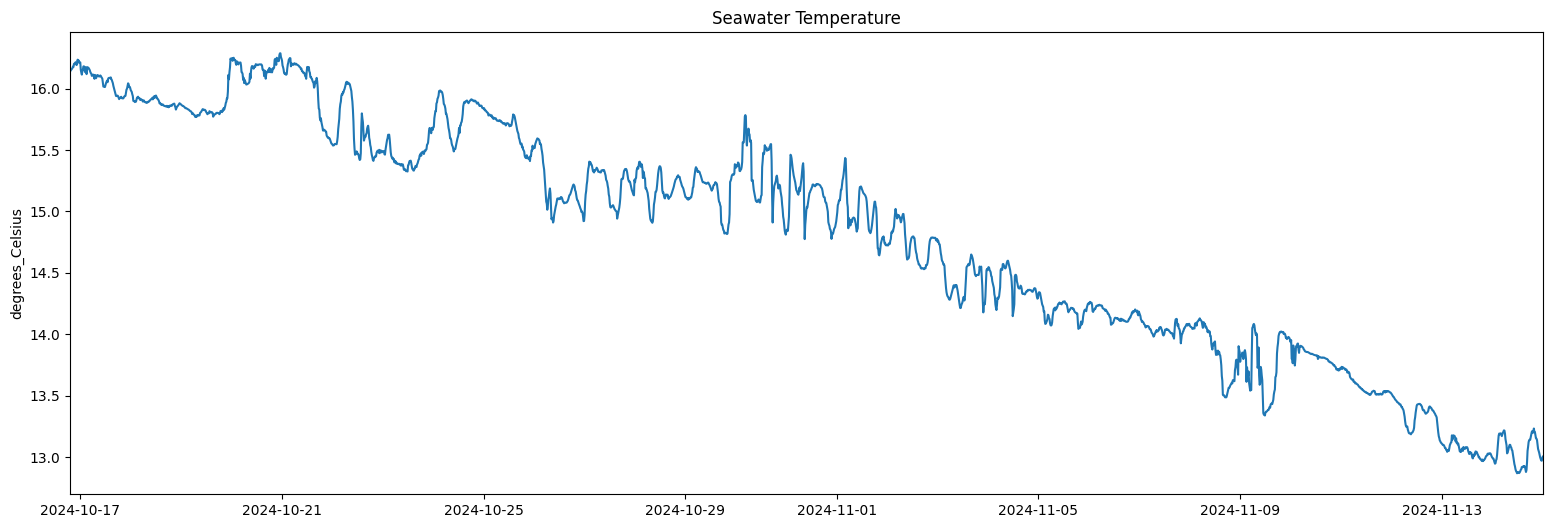

In [9]:
basic_plot(ctd.sea_water_temperature)

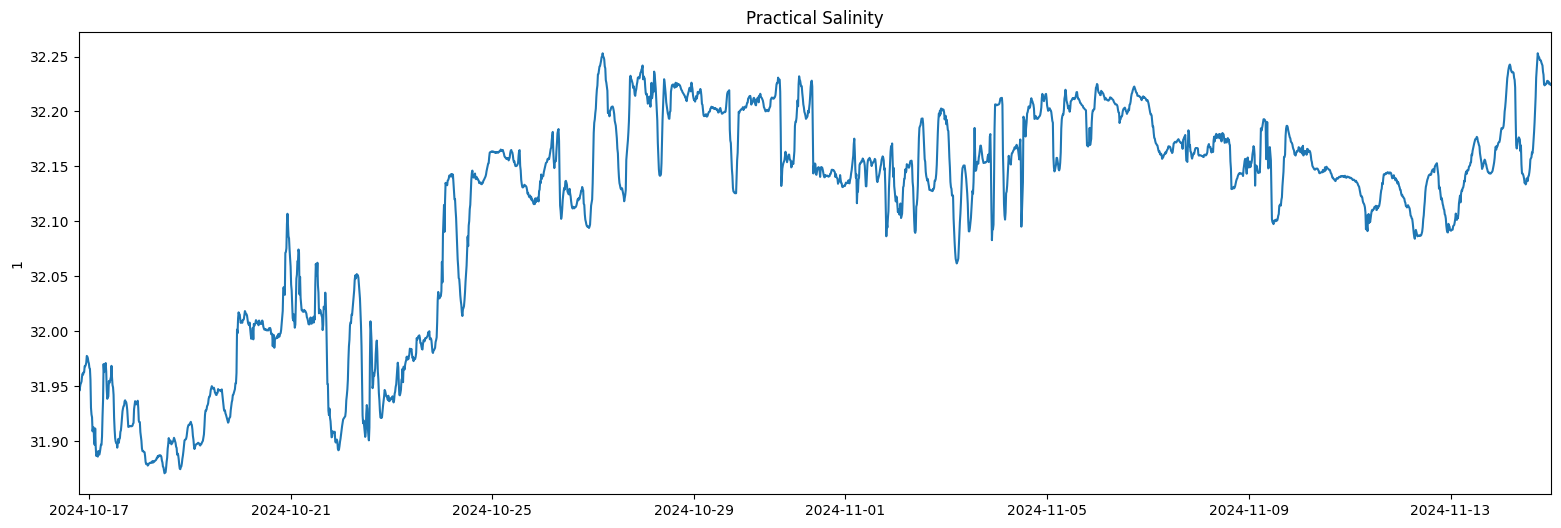

In [10]:
basic_plot(ctd.sea_water_practical_salinity)

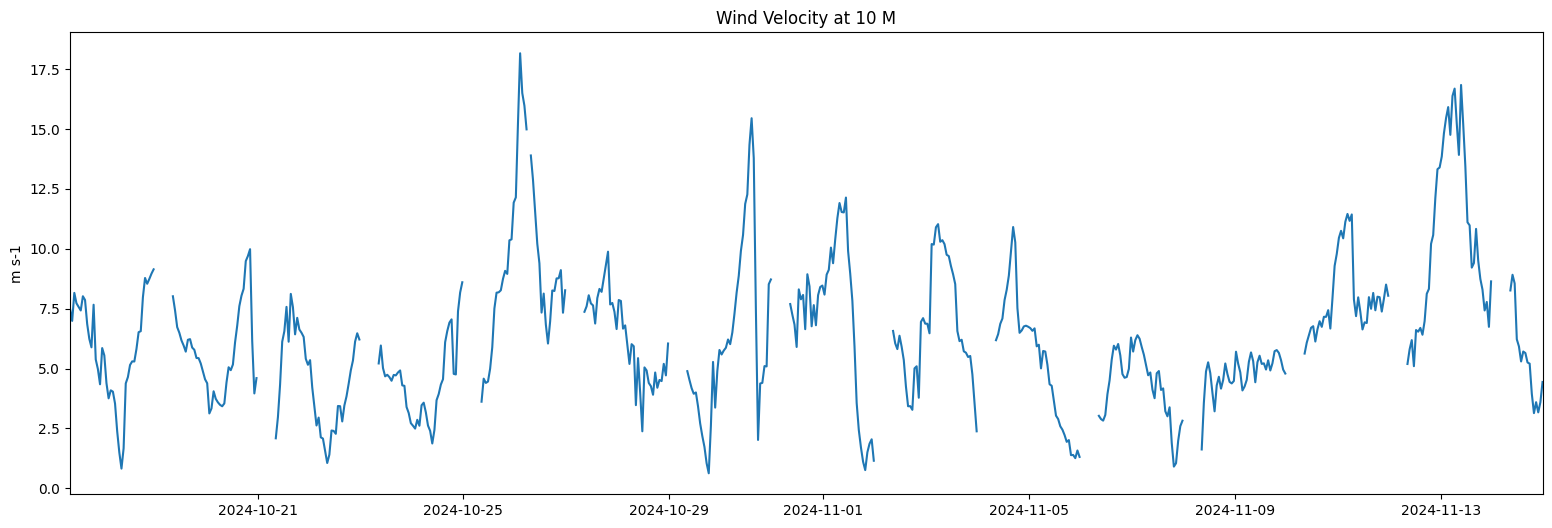

In [12]:
basic_plot(met.met_wind10m)

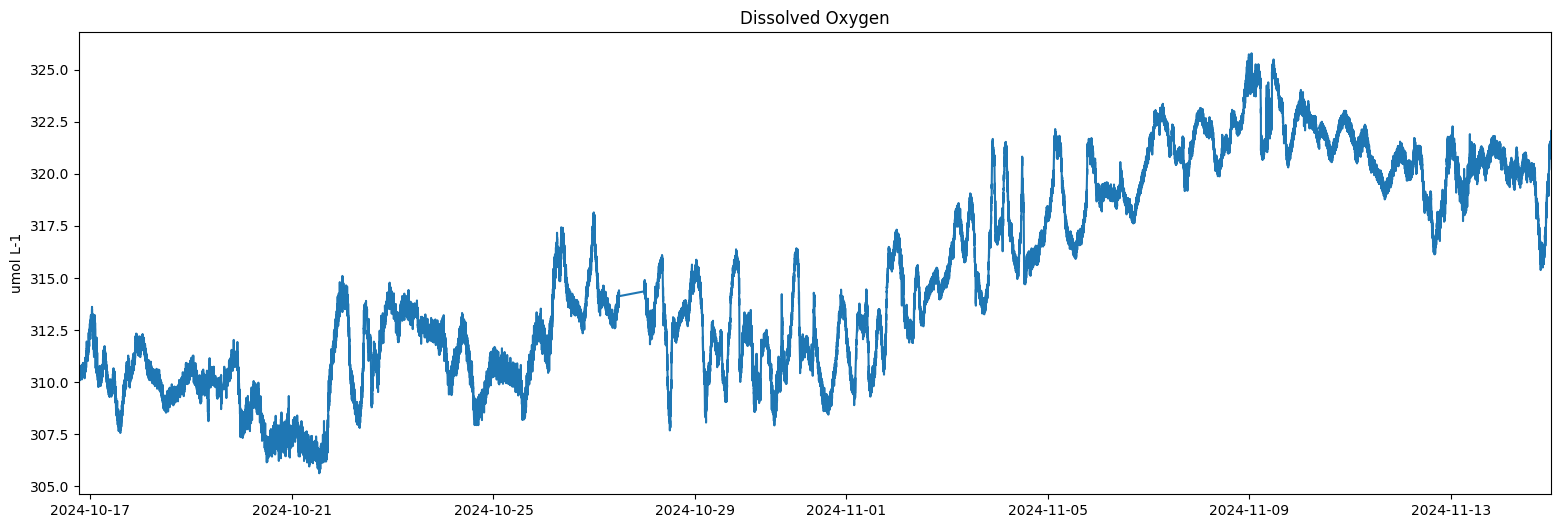

In [13]:
basic_plot(do.estimated_oxygen_concentration)

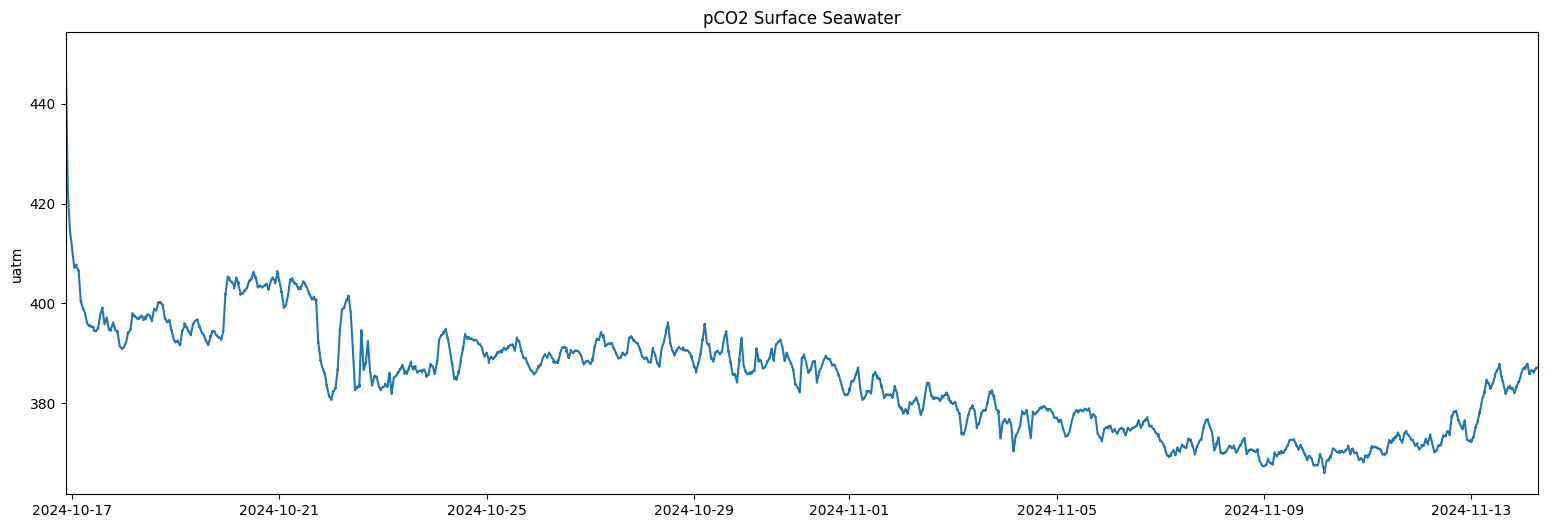

In [17]:
basic_plot(co2_wat.partial_pressure_co2_ssw)

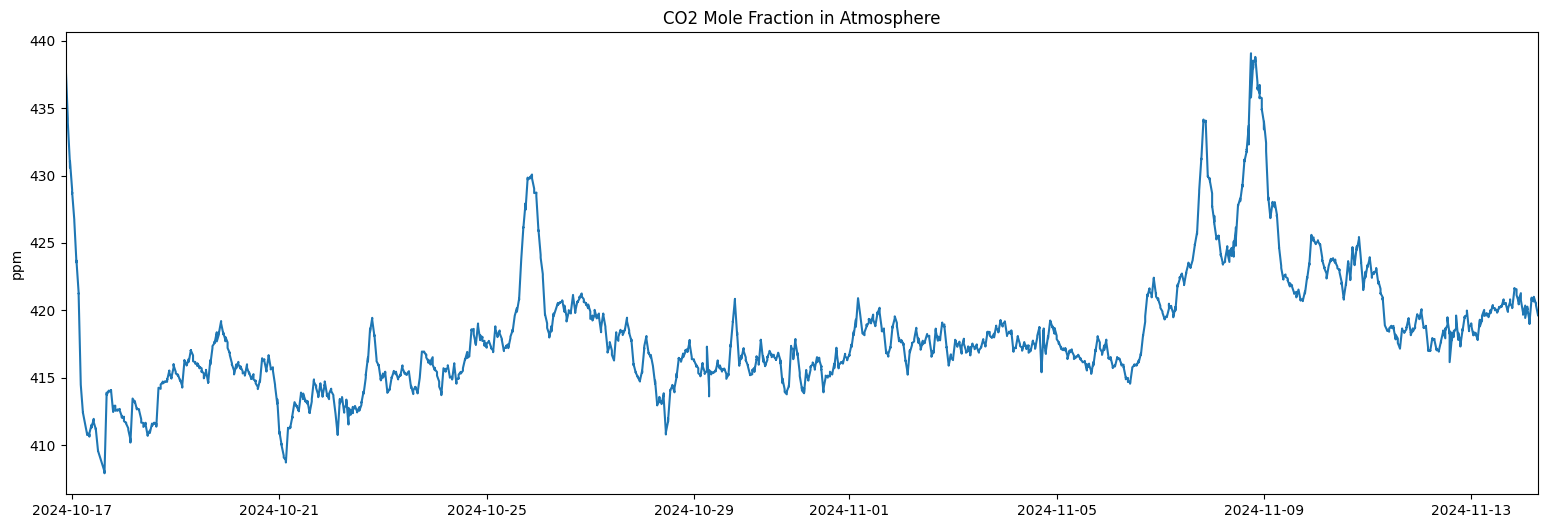

In [28]:
qaqc_mask = co2_air.measured_air_co2 <= 500
filtered_co2_data = co2_air.measured_air_co2[qaqc_mask]
basic_plot(filtered_co2_data)
#basic_plot(co2_air.measured_air_co2)